# Project-6 Détectez des faux billets

In [90]:
# Import des librairies
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import sklearn as sk

from scipy.cluster.hierarchy import linkage, fcluster, dendrogram
from matplotlib.collections import LineCollection
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans
from sklearn import decomposition, preprocessing

In [91]:
import sys
from sklearn.decomposition import PCA
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering,KMeans
from sklearn.linear_model import LogisticRegression
sns.set(style="white")
from sklearn.metrics import confusion_matrix,roc_auc_score, roc_curve, auc,precision_recall_curve
#from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

In [92]:
import pandas as pd
import numpy as np

In [93]:
df=pd.read_csv("notes.csv")

In [94]:
df.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55


In [95]:
df.tail()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87
169,False,171.96,104.00,103.95,5.63,3.26,110.96


Dataset containing the geometric characteristics of banknotes. For each of them, we know:

the length of the banknote (in mm) ;

the height of the banknote (measured on the left side, in mm);

The height of the banknote (measured on the right side, in mm) ;

the margin between the top edge of the banknote and the banknote image (in mm);

the margin between the lower edge of the banknote and its image (in mm);

the diagonal of the banknote (in mm).



In [96]:
list(df)

['is_genuine',
 'diagonal',
 'height_left',
 'height_right',
 'margin_low',
 'margin_up',
 'length']

In [97]:
df.isna().sum()

is_genuine      0
diagonal        0
height_left     0
height_right    0
margin_low      0
margin_up       0
length          0
dtype: int64

In [98]:
df.is_genuine.value_counts()

True     100
False     70
Name: is_genuine, dtype: int64

### Data Cleaning

In [99]:
df_billets=df.drop('is_genuine',axis=1)

In [100]:
df_billets.head()

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.67,103.74,103.70,4.01,2.87,113.29
2,171.83,103.76,103.76,4.40,2.88,113.84
3,171.80,103.78,103.65,3.73,3.12,113.63
4,172.05,103.70,103.75,5.04,2.27,113.55


## Mission 0
### Univariées

In [101]:
df_billets.describe()

,diagonal,height_left,height_right,margin_low,margin_up,length
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,171.940588,104.066353,103.928118,4.612118,3.170412,112.570412
std,0.305768,0.298185,0.330980,0.702103,0.236361,0.924448
min,171.040000,103.230000,103.140000,3.540000,2.270000,109.970000
25%,171.730000,103.842500,103.690000,4.050000,3.012500,111.855000
50%,171.945000,104.055000,103.950000,4.450000,3.170000,112.845000
75%,172.137500,104.287500,104.170000,5.127500,3.330000,113.287500
max,173.010000,104.860000,104.950000,6.280000,3.680000,113.980000


In [102]:
import plotly.graph_objects as go # notice not express!
fig= go.Figure(data=[go.Pie(labels=['True','False'],
values=list(df['is_genuine'].value_counts()))])
fig.update_layout(title='% of Billet Authenticity')
#plt.savefig('Billet.jpg', dpi=100)

### Percentage of True and False variable

In [103]:
count_false = len(df[df['is_genuine']==False])
count_True = len(df[df['is_genuine']==True])

pct_of_False = count_false/(count_false+count_True)
print("Percentage of True tickets :", pct_of_False * 100)

pct_of_True = count_True/(count_false+count_True)
print("Percentage of False tickets :", pct_of_True * 100)

Percentage of True tickets : 41.17647058823529
Percentage of False tickets : 58.82352941176471


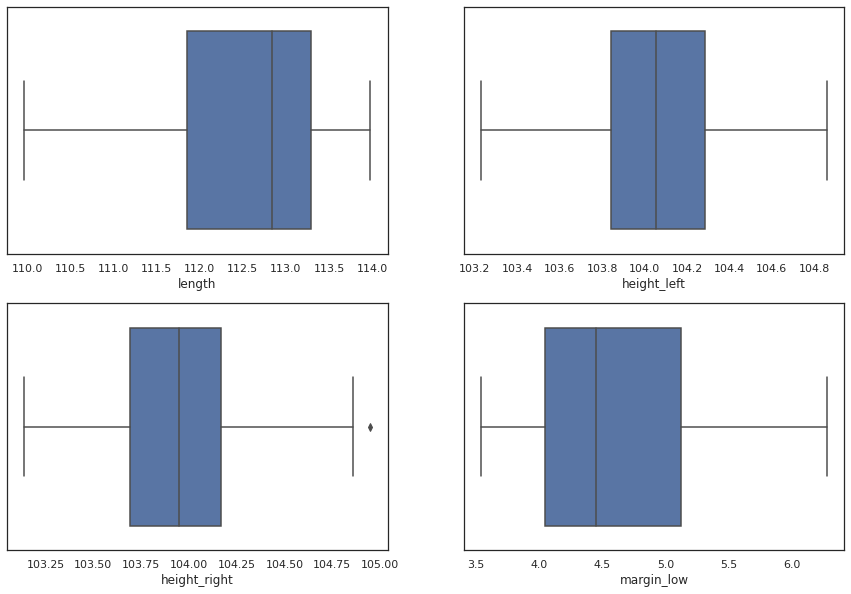

In [104]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 10)
plt.subplot(221)
sns.boxplot(x=df["length"])
plt.subplot(222)
sns.boxplot(x=df["height_left"])
plt.subplot(223)
sns.boxplot(x=df["height_right"])
plt.subplot(224)
sns.boxplot(x=df["margin_low"])
plt.show()

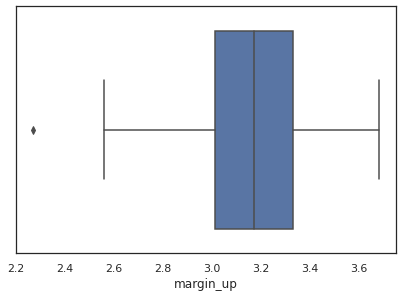

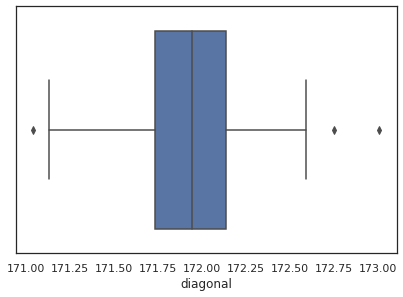

In [105]:
plt.subplot(221)
sns.boxplot(x=df["margin_up"])
plt.show()
plt.subplot(222)
sns.boxplot(x=df["diagonal"])
plt.show()

### Bivariée
### Correlation between the variables

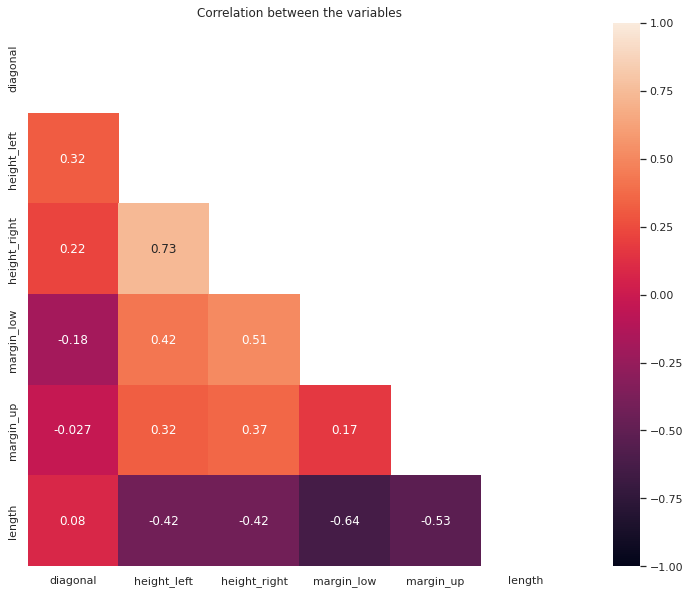

In [106]:
plt.figure(figsize=(15,10))
plt.title("Correlation between the variables")

corr = df_billets.corr()

mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(corr, mask=mask, vmin = -1,vmax=1, square=True,annot=True)
    
plt.show()

In [107]:
df_billets.head(2)

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.67,103.74,103.70,4.01,2.87,113.29


We can observe that corr is important in height left and height right because they have nearby values


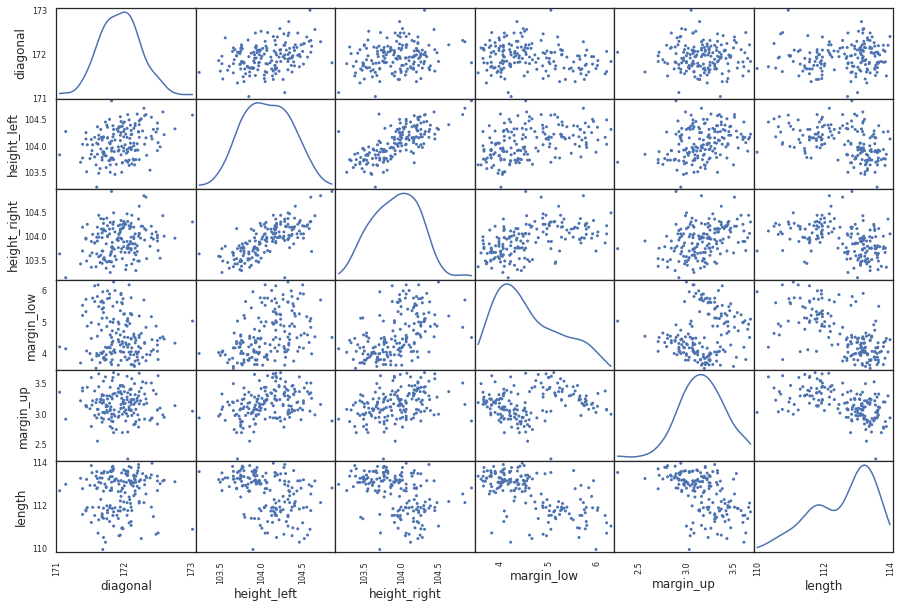

In [108]:
pd.plotting.scatter_matrix(df_billets, alpha=1, figsize=(15,10), diagonal='kde')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



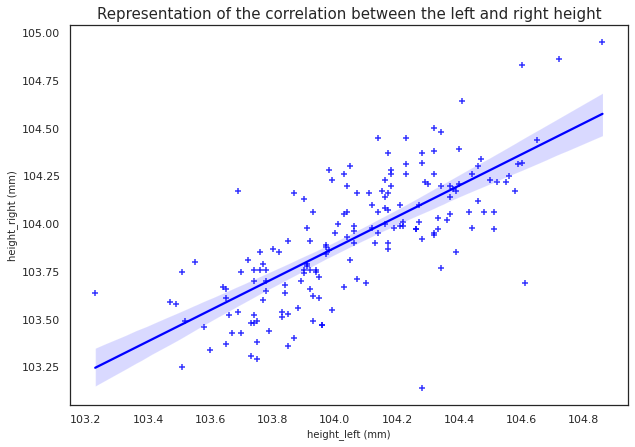

In [109]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X = df_billets.height_left
Y = df_billets.height_right

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(X, Y, color='blue', marker='+')

plt.xlabel('height_left (mm)',fontsize=10)
plt.ylabel("height_right (mm)",fontsize=10)
plt.title("Representation of the correlation between the left and right height",fontsize=15)
plt.grid(False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



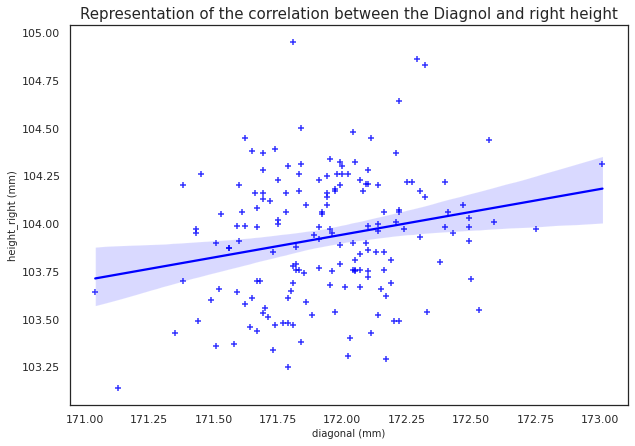

In [110]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X = df_billets.diagonal
Y = df_billets.height_right


# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(X, Y, color='blue', marker='+')

plt.xlabel('diagonal (mm)',fontsize=10)
plt.ylabel("height_right (mm)",fontsize=10)
plt.title("Representation of the correlation between the Diagnol and right height",fontsize=15)
plt.grid(False)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



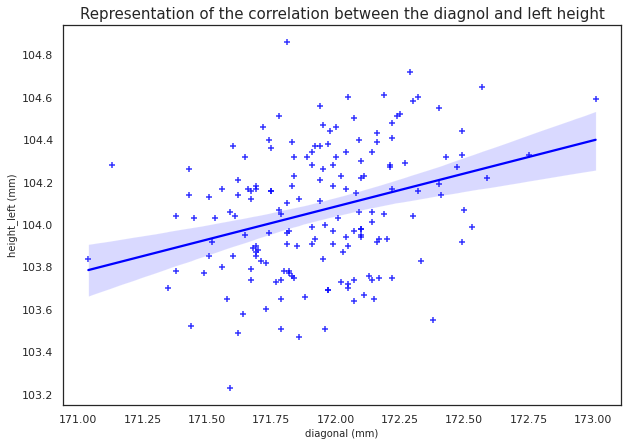

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

X = df_billets.diagonal
Y = df_billets.height_left

# regression plot using seaborn
fig = plt.figure(figsize=(10, 7))
sns.regplot(X, Y, color='blue', marker='+')

plt.xlabel('diagonal (mm)',fontsize=10)
plt.ylabel("height_left (mm)",fontsize=10)
plt.title("Representation of the correlation between the diagnol and left height",fontsize=15)
plt.grid(False)

## Mission 1 :  Perform a Principal Component Analysis of the sample, following all these steps:
### 1. Eigenvalue scree analysis
https://sanchitamangale12.medium.com/scree-plot-733ed72c8608

In [112]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_billets)
X_scaled

array([[-0.42834385,  2.6694537 ,  3.09656321, -0.13159013, -1.18987367,
         0.28163308],
       [-0.88755932, -1.09769709, -0.69125444, -0.86012554, -1.27473985,
         0.78069736],
       [-0.36274164, -1.03042654, -0.50943919, -0.30301023, -1.23230676,
         1.37740465],
       ...,
       [ 1.73652911,  0.68497248,  0.52084721,  0.38267015,  0.67718214,
        -2.05094997],
       [-0.39554274, -0.32408577, -0.1458087 ,  0.16839504,  1.61071005,
        -0.75989238],
       [ 0.06367273, -0.22317994,  0.06630909,  1.45404575,  0.38015054,
        -1.74717171]])

In [113]:
#df_billets.head()

In [114]:
from sklearn.decomposition import PCA
#define PCA model to use
pca = PCA(n_components=6)

#fit PCA model to data
pca_fit = pca.fit(X_scaled)

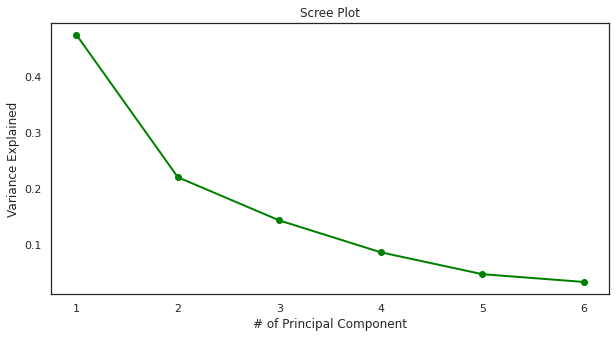

In [115]:
# Scree Plot
plt.figure(figsize=(10,5))
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='green')
plt.title('Scree Plot')
plt.xlabel('# of Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [116]:
scree= pca.explained_variance_ratio_*100
scree

array([47.44792058, 21.95710596, 14.23452433,  8.52629544,  4.61282244,
        3.22133125])

In [117]:
#sum of the variance ratio
pca.explained_variance_ratio_.cumsum()

array([0.47447921, 0.69405027, 0.83639551, 0.92165846, 0.96778669,
       1.        ])

#### Outcome: From the scree plot we can analyse that the first three principal component have contain the highest variance and store most of the information

In [118]:
scree = pd.DataFrame(scree.round(3), index=('comp 1','comp 2','comp 3','comp 4','comp 5','comp 6'))
scree.columns = ['Inertie %']
scree

,Inertie %
comp 1,47.448
comp 2,21.957
comp 3,14.235
comp 4,8.526
comp 5,4.613
comp 6,3.221


#### So, we can work on first two principal components

### 2.  Representation of the variables by the circle of correlations

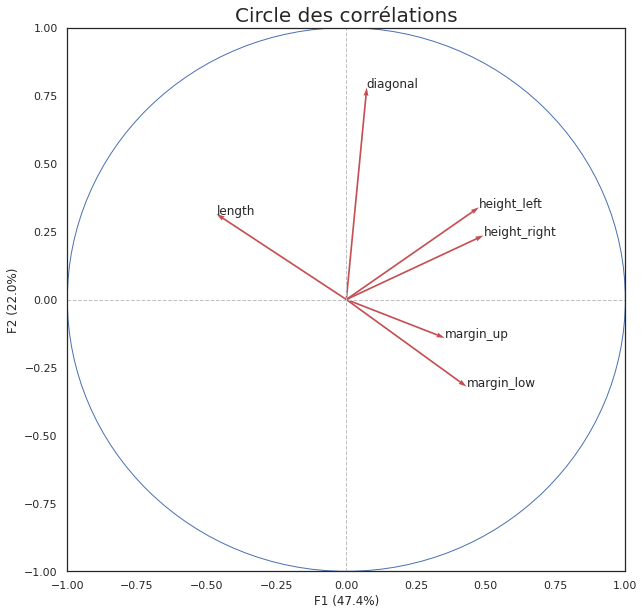

In [119]:
pcs=pca.components_

fig=plt.subplots(figsize=(10,10))
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.quiver(np.zeros(pcs.shape[1]),np.zeros(pcs.shape[1]),pcs[0,:],pcs[1,:],angles='xy',scale_units='xy',
          scale=1, color='r',width=0.003)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    plt.text(x, y, df_billets.columns[i])
    
circle = plt.Circle((0,0), 1, facecolor='none', edgecolor='b')
plt.gca().add_artist(circle)

#Ajout des axes
plt.plot([-1,1],[0,0],color='silver',linestyle='--',linewidth=1)
plt.plot([0,0],[-1,1],color='silver',linestyle='--',linewidth=1)

plt.title('Circle des corrélations', fontsize=20)
plt.xlabel('F{} ({}%)'.format(1, round(100*pca.explained_variance_ratio_[0],1)))
plt.ylabel('F{} ({}%)'.format(2, round(100*pca.explained_variance_ratio_[1],1)))
plt.show()

#####  The horizontal axis represents principal component 1. The vertical axis represents principal component 2. 
##### The length of the arrows represents how much that variable explains the variance of the data on the factorial plane. Sometimes we call this the quality of representation of that variable on the plane.

##### The angle between variables provides an indication of how well the variables are correlated on the factorial plane.
##### A small angle indicates that the representation of the two variables on the factorial plane are positively correlated
##### An angle of 90 degrees indicates no correlation
##### An angle of 180 degrees indicates a negative correlation

In [129]:
df_billets_1 = pd.DataFrame(pcs,index=['PC1','PC2','PC3','PC4', 'PC5', 'PC6'],
                      columns=["diagonal","heigh right","heigh left","margin low","margin up","length"])
df_billets_1.round(3)

,diagonal,heigh right,heigh left,margin low,margin up,length
PC1,0.073,0.476,0.492,0.431,0.353,-0.465
PC2,0.780,0.339,0.236,-0.321,-0.141,0.315
PC3,-0.089,0.123,0.154,0.513,-0.821,0.127
PC4,-0.560,0.278,0.459,-0.227,0.135,0.574
PC5,-0.225,0.716,-0.487,-0.312,-0.194,-0.254
PC6,0.122,0.232,-0.481,0.548,0.354,0.524


### 3. Representation of the individuals by the factorial plans

In [130]:
# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

In [131]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:
 
            # initialisation de la figure       
            fig = plt.figure(figsize=(7,6))
        
            # affichage des points
            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

            # affichage des labels des points
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                
            # détermination des limites du graphique
            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        
            # affichage des lignes horizontales et verticales
            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.savefig("Projection des individus")
            plt.show(block=False)

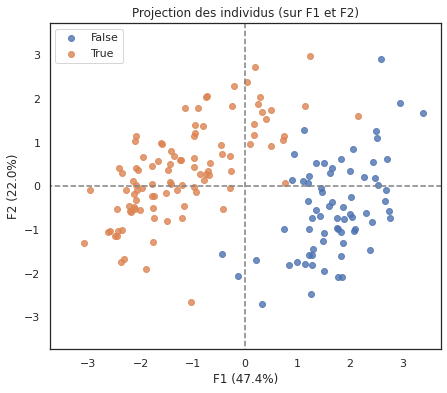

In [132]:
display_factorial_planes(X_reduced, 2, pca, [(0,1)], illustrative_var = df['is_genuine'], alpha = 0.8)

### 4. analyser de la qualité de représentation et la contribution des individus.

#####  As we can see the seperated groups (True and False) in the factorial planes, indicating how well the first factorial plane has captured the essence of the data.

## Mission 2 :  Appliquez un algorithme de classification, puis analysez le résultat obtenu.

In [133]:
#K-means clustering

In [125]:
# Create a k-means clustering model
kmeans = KMeans(init='random', n_clusters=2, n_init=10)

# Fit the data to the model
kmeans.fit(X_scaled)

# Determine which clusters each data point belongs to:
clusters =  kmeans.predict(X_scaled)

In [134]:
# Add cluster number to the original data
X_scaled_clustered = pd.DataFrame(X_scaled, columns=df_billets.columns, index=df_billets.index)
X_scaled_clustered['cluster'] = clusters

X_scaled_clustered.head()

,diagonal,height_left,height_right,margin_low,margin_up,length,cluster
0,-0.428344,2.669454,3.096563,-0.131590,-1.189874,0.281633,0
1,-0.887559,-1.097697,-0.691254,-0.860126,-1.274740,0.780697,1
2,-0.362742,-1.030427,-0.509439,-0.303010,-1.232307,1.377405,1
3,-0.461145,-0.963156,-0.842767,-1.260106,-0.213913,1.149571,1
4,0.358883,-1.232238,-0.539742,0.611230,-3.820725,1.062777,1


In [135]:
sum_of_squared_distances = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k)
    model = kmeans.fit(X_scaled)
    sum_of_squared_distances.append(kmeans.inertia_)

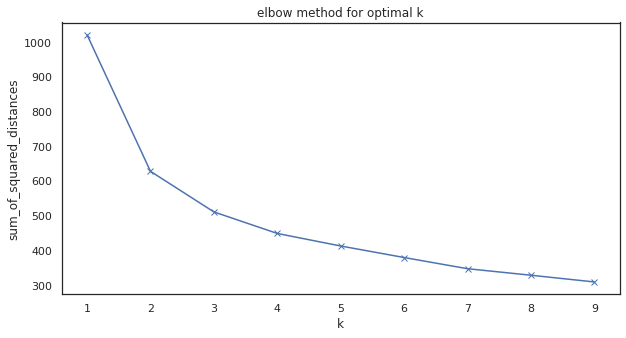

In [136]:
fig=plt.subplots(figsize=(10,5))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [137]:
## Visualize the Clusters

In [138]:
from sklearn.decomposition import PCA

# Create a PCA model to reduce our data to 2 dimensions for visualisation
pca = PCA(n_components=2)
pca.fit(X_scaled)

# Transfor the scaled data to the new PCA space
X_reduced = pca.transform(X_scaled)

In [139]:
# Convert to a data frame
X_reduceddf = pd.DataFrame(X_reduced, index=df_billets.index, columns=['PC1','PC2'])
X_reduceddf['cluster'] = clusters
X_reduceddf.head()

,PC1,PC2,cluster
0,2.153639,1.599709,0
1,-2.110416,-0.526039,1
2,-1.973152,-0.048102,1
3,-2.059795,-0.089105,1
4,-2.403180,0.412170,1


In [140]:
centres_reduced = pca.transform(kmeans.cluster_centers_)
centres_reduced

array([[ 0.29752378,  1.7244382 ],
       [ 1.68395512, -0.16927283],
       [-0.45426513,  0.95472348],
       [-2.19102617, -0.16149914],
       [ 1.1713228 , -1.74475186],
       [-1.28077973,  0.55107976],
       [ 2.47616285,  1.91806941],
       [ 1.88751178, -0.28254318],
       [-1.89055782, -0.97050002]])

#### Visualisez la partition obtenue dans le premier plan factoriel de l'ACP, puis analysez-la.

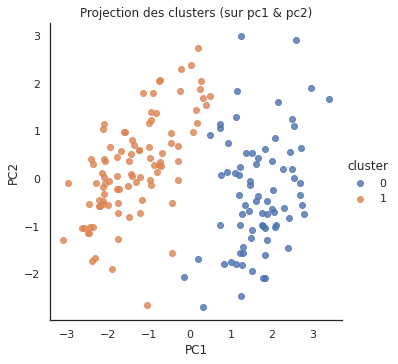

In [141]:
# Projection des individus selon variable illustrative
sns.lmplot(x="PC1", y = "PC2", hue="cluster", data=X_reduceddf, fit_reg=False)
plt.title("Projection des clusters (sur pc1 & pc2)")
plt.show()

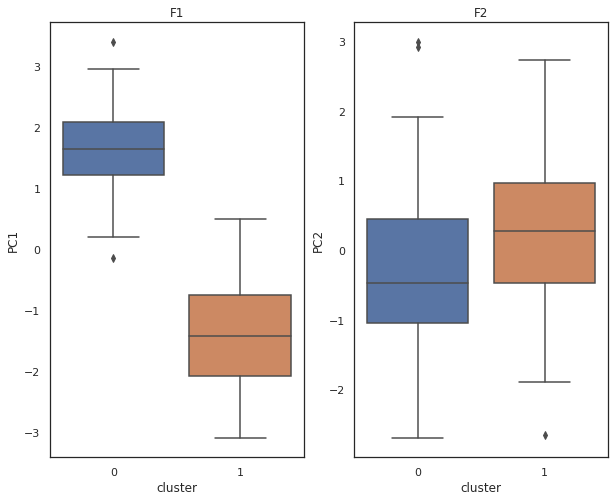

In [142]:
#Projection box plot
fig=plt.subplots(figsize=(10,8))
plt.subplot(121)
sns.boxplot(x=X_reduceddf["cluster"], y=X_reduceddf["PC1"])
plt.title("F1")

plt.subplot(122)
sns.boxplot( x=X_reduceddf["cluster"], y=X_reduceddf["PC2"])
plt.title("F2")
plt.show()

#### Interpretation: 

## Mission 3: Modélisez les données à l'aide d'une régression logistique.

Pour la régression logistique :

D'abord je fais le modèle qui donne la probabilité qu'un événement se produise en fonction des valeurs de la variable indépendante. 

Ensuite, j'estime la probabilité qu'un événement se produise

Ensuite, prédire l'effet d'une série de variables 

Ensuite, classer l'observation en estimant la probabilité.

### Donc le modèle donne soit vrai soit faux

In [143]:
data_model=df.copy()
data_model

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.67,103.74,103.70,4.01,2.87,113.29
2,True,171.83,103.76,103.76,4.40,2.88,113.84
3,True,171.80,103.78,103.65,3.73,3.12,113.63
4,True,172.05,103.70,103.75,5.04,2.27,113.55
...,...,...,...,...,...,...,...
165,False,172.11,104.23,104.45,5.24,3.58,111.78
166,False,173.01,104.59,104.31,5.04,3.05,110.91
167,False,172.47,104.27,104.10,4.88,3.33,110.68
168,False,171.82,103.97,103.88,4.73,3.55,111.87


### Pour préparer le modèle, je sélectionne la caractéristique

In [144]:
from sklearn.linear_model import LogisticRegression
X = data_model.drop(['is_genuine'], axis=1).values
y = data_model['is_genuine']

In [145]:
y.value_counts()

True     100
False     70
Name: is_genuine, dtype: int64

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.

/usr/local/lib/python3.7/dist-packages/statsmodels/genmod/families/family.py:890: RuntimeWarning:

invalid value encountered in true_divide



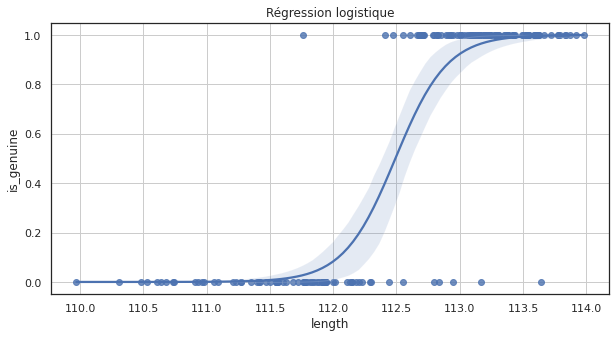

In [146]:
fig=plt.subplots(figsize=(10,5))
sns.regplot(x = 'length', y = 'is_genuine', data=data_model, logistic=True)
plt.title('Régression logistique')
plt.grid()

### divisé en deux ensembles de données, l'un pour l'train et l'autre pour le test

In [147]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

In [148]:
sc_x = StandardScaler()
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [149]:
from sklearn.linear_model import LogisticRegression
cat=LogisticRegression(solver = 'liblinear')
cat.fit(x_train,y_train)

LogisticRegression(solver='liblinear')

In [150]:
cat.score(x_train,y_train)

0.9915966386554622

In [151]:
# Check model performance on training data
predictions = cat.predict(x_train)
predictions

array([False, False, False, False,  True, False,  True,  True,  True,
       False, False,  True,  True, False, False, False, False,  True,
       False, False, False,  True, False,  True,  True,  True,  True,
       False,  True, False,  True,  True, False,  True, False,  True,
        True,  True,  True, False, False, False, False, False, False,
        True,  True,  True, False,  True, False, False, False,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True, False,  True,  True, False, False,  True,  True, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True, False, False,  True, False, False,  True,  True,  True,
       False,  True, False, False,  True,  True,  True, False,  True,
        True,  True])

In [152]:
cat.score(x_test,y_test)

1.0

In [153]:
y_pred = cat.predict(x_test)

In [154]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(cat.score(x_test,y_test)))

Accuracy of logistic regression classifier on test set: 1.00


In [155]:
# Evaluation of the model:
# Matrice de confusion
reg_matrix = confusion_matrix(y_test, y_pred)
reg_matrix = pd.DataFrame(reg_matrix, index = ['True','False'], columns = ['Predicted Negative', 'Predicted Positive'])
reg_matrix

,Predicted Negative,Predicted Positive
True,21,0
False,0,30


In [156]:
print(f"{reg_matrix.iloc[0,0]} et {reg_matrix.iloc[1,1]} est le nombre de prédictions correctes.")
print(f"{reg_matrix.iloc[1,0]} et {reg_matrix.iloc[0,1]} est le nombre de prédictions incorrectes.")

21 et 30 est le nombre de prédictions correctes.
0 et 0 est le nombre de prédictions incorrectes.


### puis prédire et évaluer le modèle 


In [157]:
from sklearn import metrics

In [158]:
accurracy_mc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accurracy_mc)

Accuracy: 1.0


Text(0.5, 21.5, 'Prédiction')

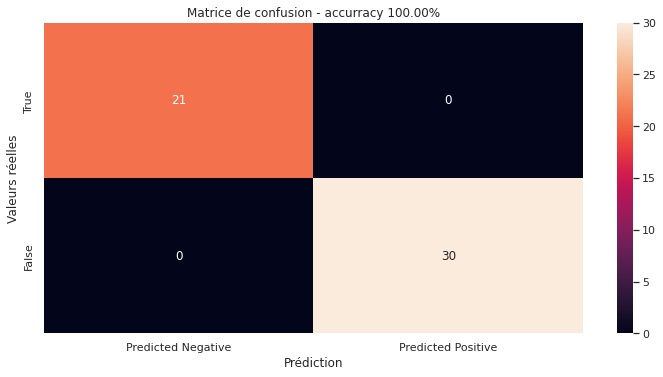

In [159]:
fig=plt.subplots(figsize=(10,5))
sns.heatmap(pd.DataFrame(reg_matrix),annot=True,fmt='d')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Matrice de confusion - accurracy {}'.format(f'{metrics.accuracy_score(y_test, y_pred):.2%}'), y=1.1)
plt.ylabel('Valeurs réelles')
plt.xlabel('Prédiction')

#### puis je calcule le score de précision 

In [160]:
# precision : tp / (tp + fp) 
print("Precision:",metrics.precision_score(y_test, y_pred)) 

# recall : tp / (tp + fn)
print("Recall:",metrics.recall_score(y_test, y_pred)) 

Precision: 1.0
Recall: 1.0


In [161]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        21
        True       1.00      1.00      1.00        30

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



In [162]:
y_pred=cat.predict(x_test)
y_pred

array([ True,  True, False, False,  True,  True, False,  True,  True,
        True,  True, False, False,  True, False,  True,  True,  True,
        True,  True,  True,  True, False,  True, False,  True, False,
       False,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True, False, False, False, False, False, False, False,
        True, False,  True,  True,  True, False])

As the area under an ROC curve is a measure of the usefulness of a test in general, where a greater area means a more useful test, the areas under ROC curves are used to compare the usefulness of tests.

Comme la surface sous une courbe ROC est une mesure de l'utilité d'un test en général, où une surface plus grande signifie un test plus utile, les surfaces sous les courbes ROC sont utilisées pour comparer l'utilité des tests.

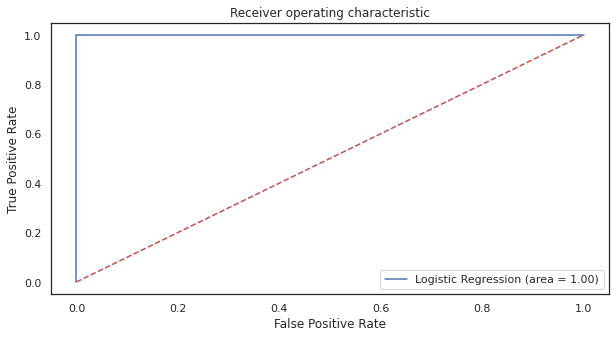

In [163]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, cat.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, cat.predict_proba(x_test)[:,1])
fig=plt.subplots(figsize=(10,5))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [164]:
# Stockage de prédictions
predictions = cat.predict(x_test)
print(predictions)
#print(y_test)

[ True  True False False  True  True False  True  True  True  True False
 False  True False  True  True  True  True  True  True  True False  True
 False  True False False  True False  True  True  True  True  True  True
 False  True False False False False False False False  True False  True
  True  True False]


In [165]:
print(y_test)

44      True
14      True
129    False
101    False
98      True
32      True
143    False
8       True
96      True
59      True
73      True
137    False
120    False
7       True
132    False
34      True
39      True
40      True
79      True
25      True
23      True
86      True
160    False
47      True
111    False
62      True
121    False
148    False
84      True
124    False
70      True
10      True
81      True
0       True
71      True
4       True
165    False
61      True
123    False
159    False
166    False
161    False
114    False
151    False
152    False
77      True
163    False
64      True
28      True
52      True
102    False
Name: is_genuine, dtype: bool


### Mission_4

In [166]:
test_data=pd.read_csv("example.csv")
test_data

,diagonal,height_left,height_right,margin_low,margin_up,length,id
0,171.76,104.01,103.54,5.21,3.30,111.42,A_1
1,171.87,104.17,104.13,6.00,3.31,112.09,A_2
2,172.00,104.58,104.29,4.99,3.39,111.57,A_3
3,172.49,104.55,104.34,4.44,3.03,113.20,A_4
4,171.65,103.63,103.56,3.77,3.16,113.33,A_5


In [167]:
# Préparation des données
new_predict = test_data[['length', 'height_left', 'height_right', 'margin_low', 'margin_up', 'diagonal']]

# Application du modèle
predict = cat.predict(new_predict)

# Probabilités
cat.predict_proba(new_predict)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.]])

In [168]:
cat.classes_

array([False,  True])

In [169]:
probas_ex = cat.predict_proba(new_predict)

new_predict['Probas_faux'] = probas_ex[:,0]
new_predict['Probas_vrais'] = probas_ex[:,1]
new_predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning:

X has feature names, but LogisticRegression was fitted without feature names



,length,height_left,height_right,margin_low,margin_up,diagonal,Probas_faux,Probas_vrais
0,111.42,104.01,103.54,5.21,3.30,171.76,0.0,1.0
1,112.09,104.17,104.13,6.00,3.31,171.87,0.0,1.0
2,111.57,104.58,104.29,4.99,3.39,172.00,0.0,1.0
3,113.20,104.55,104.34,4.44,3.03,172.49,0.0,1.0
4,113.33,103.63,103.56,3.77,3.16,171.65,0.0,1.0


In [170]:
# Ajout du resultat et création du df
prediction=pd.DataFrame({'id': test_data.id,
                        'probalité_true' : new_predict.Probas_vrais,
                        'probalité_false' : new_predict.Probas_faux,
                        'prédiction' : predict})

prediction

,id,probalité_true,probalité_false,prédiction
0,A_1,1.0,0.0,True
1,A_2,1.0,0.0,True
2,A_3,1.0,0.0,True
3,A_4,1.0,0.0,True
4,A_5,1.0,0.0,True


### Second_Method

In [171]:
from sklearn.linear_model import LogisticRegression
X = test_data.drop(['id'], axis=1).values

In [172]:
probabilites = cat.predict(X)

In [173]:
probabilites

array([ True,  True,  True,  True,  True])

In [174]:
print(pd.DataFrame({'ID':test_data['id'],'Nature':probabilites}))

    ID  Nature
0  A_1    True
1  A_2    True
2  A_3    True
3  A_4    True
4  A_5    True
